In [1]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    compress_repeated_epochs,
    batch_analysis,
    add_new_deep_sup,
    custom_plots
)
from ripple_heterogeneity.replay import replay_fig
from ad_ied.replay import replay_run
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random
from matplotlib.ticker import AutoMinorLocator

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'D:\github\ad_ied\results'


In [16]:
save_path = r"D:\github\ad_ied\results\replay_v2"

df = replay_run.load_results(save_path,pre_task_post=True,verbose=True)
df = df.query("decoding_median_error < 20 & score_pval_col_cycle < 0.05")


D:\github\ad_ied\results\replay_v2\X__AD_sessions_AD_10_sess25_AZ10_210806_sess25.pkl
D:\github\ad_ied\results\replay_v2\X__AD_sessions_AD_10_sess25_AZ15_221102_sess8.pkl
D:\github\ad_ied\results\replay_v2\X__AD_sessions_AD_10_sess25_Naz1_210324_sess5.pkl
D:\github\ad_ied\results\replay_v2\X__AD_sessions_AZ11_210427_sess8.pkl
D:\github\ad_ied\results\replay_v2\X__AD_sessions_AZ12_210323_sess3.pkl
D:\github\ad_ied\results\replay_v2\X__AD_sessions_AZ12_210325_sess4.pkl
D:\github\ad_ied\results\replay_v2\X__AD_sessions_WT_1_sess26_Naz1_210811_sess26.pkl


In [17]:
df

,start,stop,duration,n_active,inactive_bin_prop,trajectory_score,r_squared,slope,intercept,score_pval_time_swap,...,traj_step,replay_type,pop_partic,decoding_r2,decoding_r2_pval,decoding_median_error,total_units,direction,epoch,basepath
2657,1281.96345,1282.04345,0.08,33,0.000000,0.856226,0.806452,7.532051,-231.987179,0.161838,...,7.532051,forward,0.362637,0.628850,0.003984,3.526077,91.0,right_epochs,pre_sleep,X:\AD_sessions\AD_10_sess25\Naz1_210324_sess5
2671,1423.32345,1423.42345,0.10,28,0.200000,0.386711,0.784725,-14.160256,1715.801282,0.419580,...,14.160256,reverse,0.307692,0.628850,0.003984,3.526077,91.0,right_epochs,pre_sleep,X:\AD_sessions\AD_10_sess25\Naz1_210324_sess5
2673,1429.84345,1429.92345,0.08,25,0.000000,0.478012,0.533333,-2.410256,357.923077,0.328671,...,2.410256,reverse,0.274725,0.628850,0.003984,3.526077,91.0,right_epochs,pre_sleep,X:\AD_sessions\AD_10_sess25\Naz1_210324_sess5
2674,1431.22345,1431.30345,0.08,44,0.000000,0.565103,0.900000,-3.615385,524.230769,0.903097,...,3.615385,reverse,0.483516,0.628850,0.003984,3.526077,91.0,right_epochs,pre_sleep,X:\AD_sessions\AD_10_sess25\Naz1_210324_sess5
2684,1446.02345,1446.12345,0.10,47,0.200000,0.762206,0.852632,5.423077,-835.756410,0.157842,...,5.423077,forward,0.516484,0.628850,0.003984,3.526077,91.0,right_epochs,pre_sleep,X:\AD_sessions\AD_10_sess25\Naz1_210324_sess5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34211,19316.50395,19316.58395,0.08,20,0.000000,0.584926,0.284729,-5.145946,84300.583784,0.456543,...,5.145946,reverse,0.307692,0.562271,0.003984,6.944527,65.0,left_epochs,post_sleep,X:\AD_sessions\AZ12_210325_sess4
34221,19347.88395,19347.98395,0.10,21,0.200000,0.471302,0.171429,3.632432,-59542.227027,0.499500,...,3.632432,forward,0.323077,0.562271,0.003984,6.944527,65.0,left_epochs,post_sleep,X:\AD_sessions\AZ12_210325_sess4
34226,19354.40395,19354.54395,0.14,23,0.142857,0.320035,0.750237,30.875676,-506893.636036,0.019980,...,30.875676,forward,0.353846,0.562271,0.003984,6.944527,65.0,left_epochs,post_sleep,X:\AD_sessions\AZ12_210325_sess4
34227,19354.58395,19354.68395,0.10,26,0.000000,0.667895,0.003125,0.302703,-4818.118919,0.738262,...,0.302703,forward,0.400000,0.562271,0.003984,6.944527,65.0,left_epochs,post_sleep,X:\AD_sessions\AZ12_210325_sess4


In [ ]:
functions.count_events()

In [22]:
# basepath = r"X:\AD_sessions\AD_10_sess25\Naz1_210324_sess5"
basepath = r"X:\AD_sessions\AZ12_210323_sess3"
ied_epochs = loading.load_ied_events(basepath)
ied_epochs

,start,stop,center
0,2408.8032,2408.8752,2408.8392
1,2439.7336,2439.7888,2439.7592
2,2440.1552,2440.2568,2440.2024
3,2443.2608,2443.3240,2443.2880
4,2445.1768,2445.2488,2445.2144
...,...,...,...
151,22235.8976,22235.9520,22235.9216
152,22267.4152,22267.4720,22267.4408
153,22317.4920,22317.5480,22317.5176
154,22321.9656,22322.0248,22321.9920


In [24]:
current_df = df.query("basepath == @basepath")

In [31]:
current_df.shape

(1799, 23)

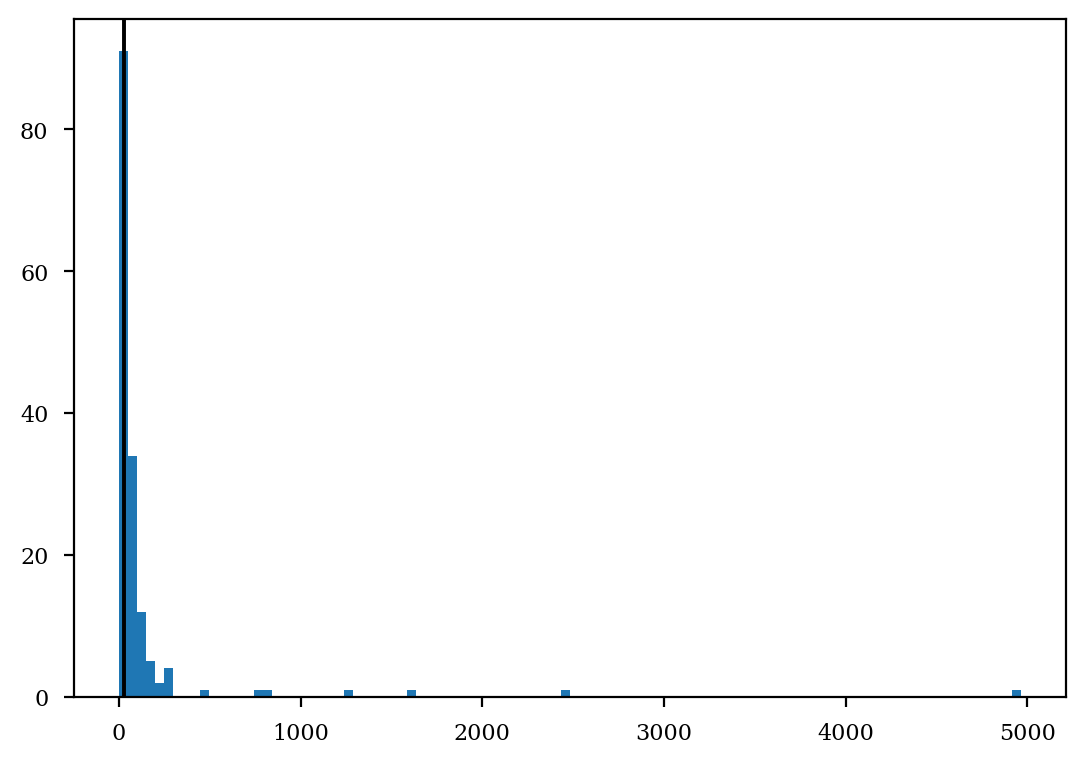

In [60]:
plt.hist(np.diff(ied_epochs.start),100)
plt.axvline(30,color="k")
plt.show()

In [88]:
# ied_epochs.start

In [69]:
from nelpy.plotting import epochplot

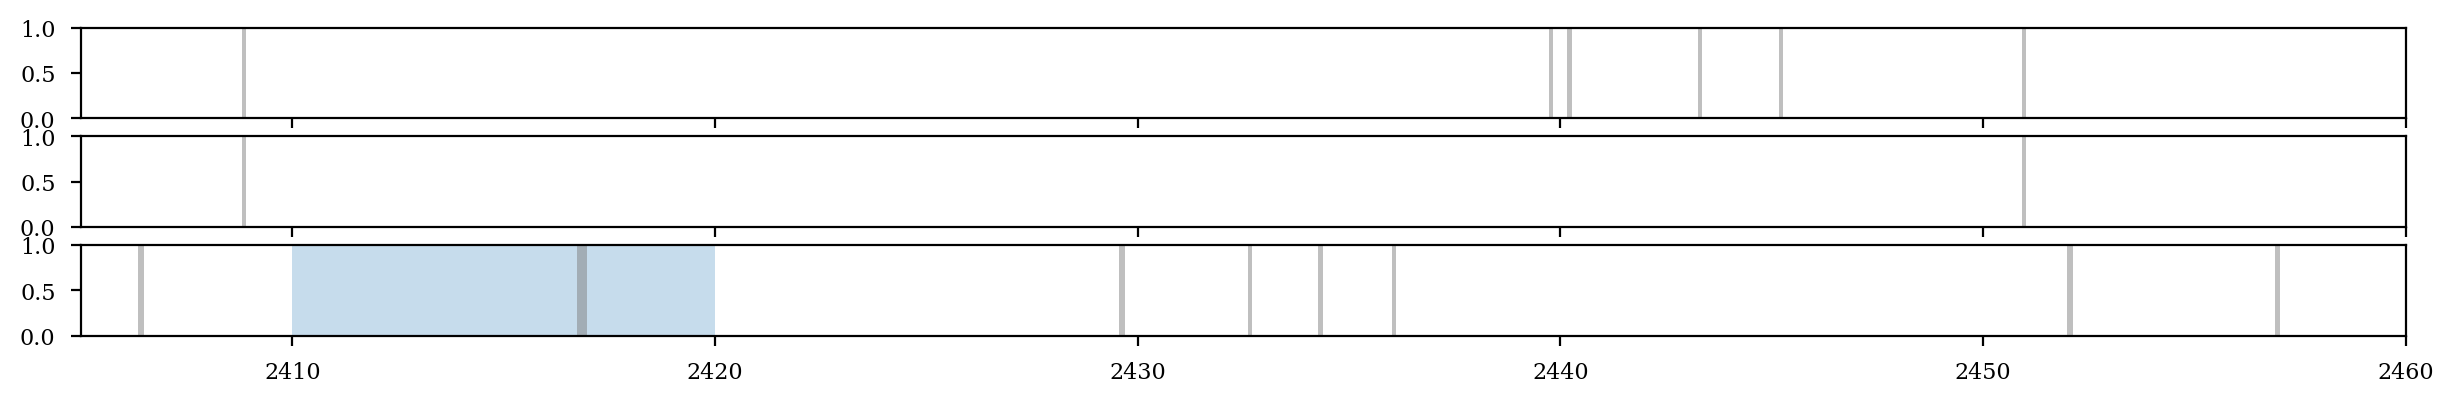

In [85]:
ied_epochs_temp = ied_epochs.loc[np.where(np.diff(ied_epochs.center)>30)]
ied = nel.EpochArray(np.array([ied_epochs_temp.start,ied_epochs_temp.stop]).T)
ied_obs = nel.EpochArray(np.array([ied_epochs.start,ied_epochs.stop]).T)

replay = nel.EpochArray(np.array([current_df.start,current_df.stop]).T)

fig,ax = plt.subplots(3,1,figsize=(15,2),sharex=True)
epochplot(ied_obs,ax=ax[0])
epochplot(ied,ax=ax[1])
epochplot(replay,ax=ax[2])
plt.xlim(2405,2460)
plt.axvspan(2410,2420,alpha=.25,zorder=-1000)

In [175]:
def classify_events(events_1, events_2, interval_pre=[-20,-10], interval_post=[0,10]):
    """
    Classifies events from events_1 as 'post', 'pre', or 'other' 
    based on their relation to events in events_2. An event is 
    classified as 'post' if it occurs 0 to 10 seconds after an event 
    in events_2, 'pre' if it occurs -20 to -10 seconds before an event 
    in events_2, and 'other' if it does not meet either of these criteria.

    Parameters:
      events_1 (list): A list of events.
      events_2 (list): A list of events.

    Returns:
      list: A list of strings with the same length as events_1. 
      Each string indicates whether the corresponding event in events_1 
      occurred 'post', 'pre', or 'other' relative to an event in events_2.
    """
    # Initialize a list to store the results
    classifications = []

    # Iterate through the events in events_1
    for event_1 in events_1:
        # Initialize a flag to track whether the event has been classified
        classified = False
        # Iterate through the events in events_2
        for event_2 in events_2:
            evt_diff = event_1 - event_2
            # Check if event_1 occurs 0 to 10 seconds after event_2
            if evt_diff > interval_post[0] and evt_diff <= interval_post[1] and not (evt_diff < interval_pre[1] and evt_diff >= interval_pre[0]):
                # If the event occurs 0 to 10 seconds after event_2, classify it as 'post' and set the flag to True
                classifications.append("post")
                classified = True
                break
            # Check if event_1 occurs -20 to -10 seconds before event_2
            elif evt_diff < interval_pre[1] and evt_diff >= interval_pre[0] and not (evt_diff > interval_post[0] and evt_diff <= interval_post[1]):
                # If the event occurs -20 to -10 seconds before event_2, classify it as 'pre' and set the flag to True
                classifications.append("pre")
                classified = True
                break
        # If the event has not been classified, classify it as 'other'
        if not classified:
            classifications.append("other")

    # Return the list of classifications
    return classifications


label = classify_events(current_df.start.values, ied_epochs.start)
current_df["label"] = label

len(label)


1799

<AxesSubplot: xlabel='label', ylabel='trajectory_score'>

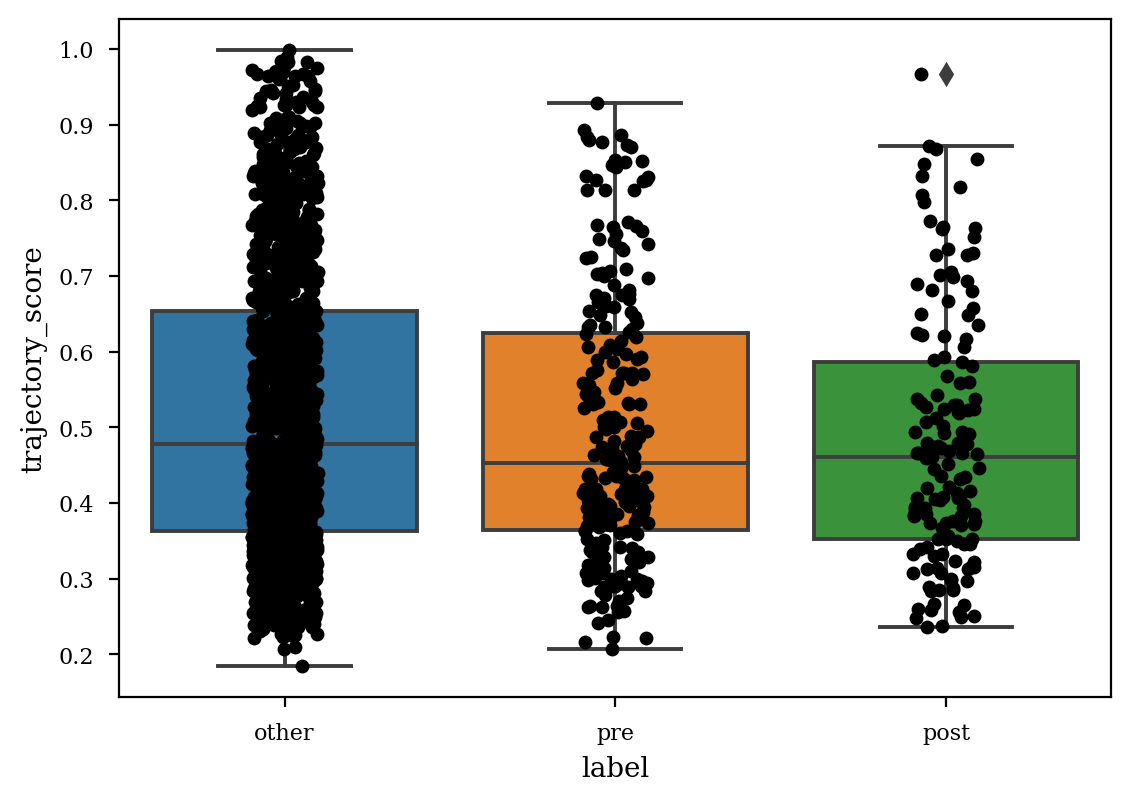

In [266]:
# current_df.query("label.str.contains('pre')")
sns.boxplot(data=current_df,x="label",y="trajectory_score")
sns.stripplot(data=current_df,x="label",y="trajectory_score",color="k")


In [141]:
# label = []
# for replay_start in current_df.start.values:
#     time_diff = replay_start - ied_epochs.start.values
#     time_diff_post = time_diff[time_diff > 0]
#     if len(time_diff_post) == 0:
#         time_diff_post = np.nan
#     if (np.min(time_diff_post) < 10) and (np.min(time_diff_post) > 0) and not ((time_diff.max() > -20) and (time_diff.max() < -10)):
#         label.append("post")
#     elif (time_diff.max() > -20) and (time_diff.max() < -10) and not ((np.min(time_diff_post) < 10) and (np.min(time_diff_post) > 0)):
#         label.append("pre")
#     else:
#         label.append("other")
# current_df["label"] = label

# current_df.query("label.str.contains('pre_ied|post_ied')")

<AxesSubplot: >

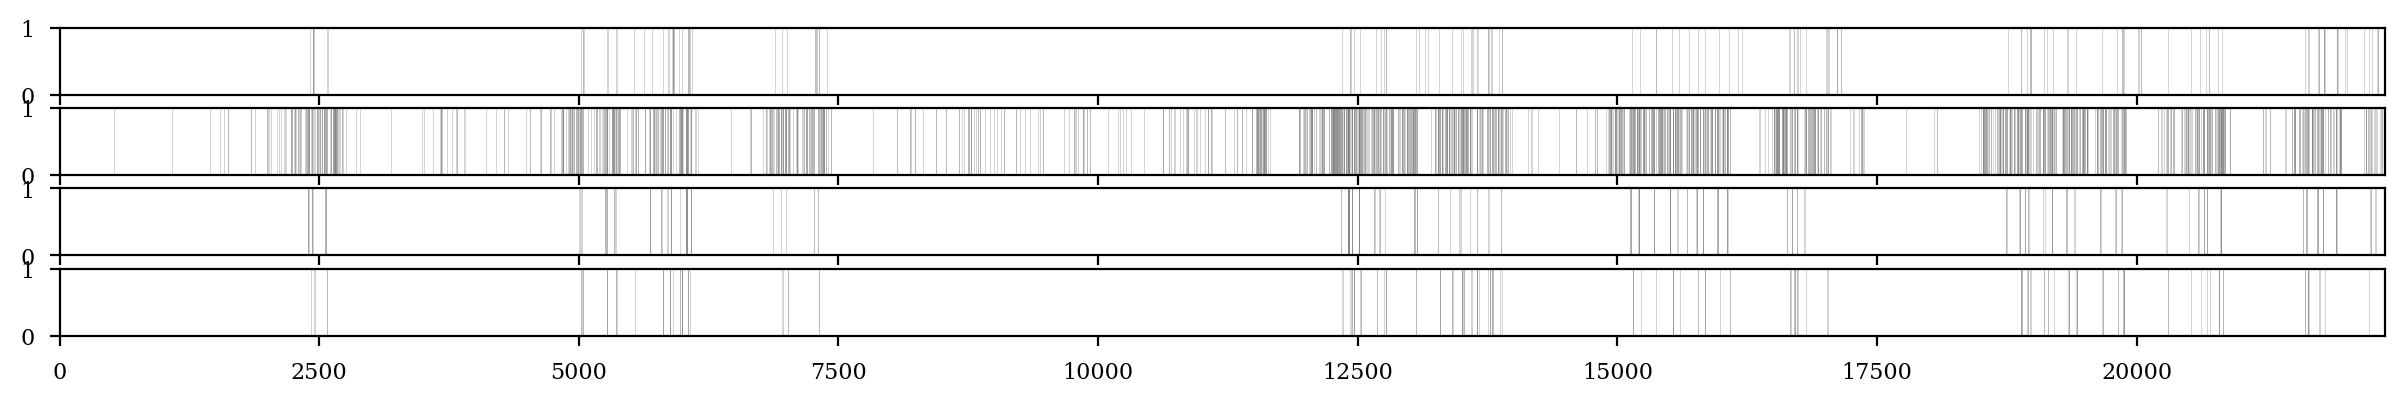

In [170]:
ied_obs = nel.EpochArray(np.array([ied_epochs.start,ied_epochs.stop]).T)
replay = nel.EpochArray(np.array([current_df.start,current_df.stop]).T)
replay_pre = nel.EpochArray(np.array([current_df.query("label.str.contains('pre')").start,current_df.query("label.str.contains('pre')").stop]).T)
replay_post = nel.EpochArray(np.array([current_df.query("label.str.contains('post')").start,current_df.query("label.str.contains('post')").stop]).T)

fig,ax = plt.subplots(4,1,figsize=(15,2),sharex=True)
epochplot(ied_obs,ax=ax[0])
epochplot(replay,ax=ax[1])
epochplot(replay_pre,ax=ax[2])
epochplot(replay_post,ax=ax[3])


In [171]:
replay_pre,replay_post

(<EpochArray at 0x26e0a538e80: 240 epochs> of length 23.6 seconds,
 <EpochArray at 0x26e0c557670: 174 epochs> of length 17.44 seconds)

(5970.0, 6000.0)

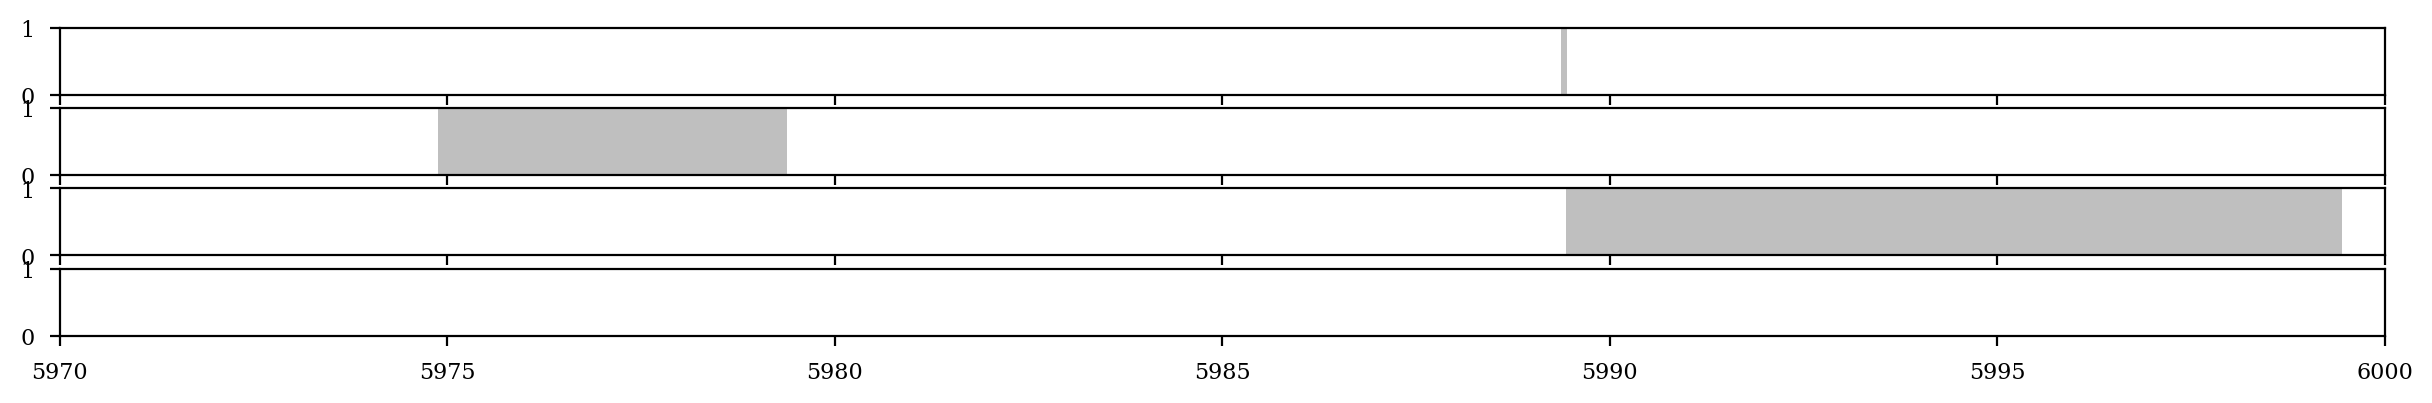

In [264]:
ied_obs = nel.EpochArray(np.array([ied_epochs.start,ied_epochs.stop]).T)

ied_obs_pre_ = nel.EpochArray(np.array([ied_epochs.start - 20,ied_epochs.start - 10]).T)
ied_obs_post_ = nel.EpochArray(np.array([ied_epochs.stop,ied_epochs.stop+10]).T)

ied_obs_pre = ied_obs_pre_[~ied_obs_post_]

ied_obs_post = ied_obs_post_[~ied_obs_pre_]

fig,ax = plt.subplots(4,1,figsize=(15,2),sharex=True)
epochplot(ied_obs,ax=ax[0])
epochplot(ied_obs_pre,ax=ax[1])
epochplot(ied_obs_post,ax=ax[2])
plt.xlim(5970,6000)

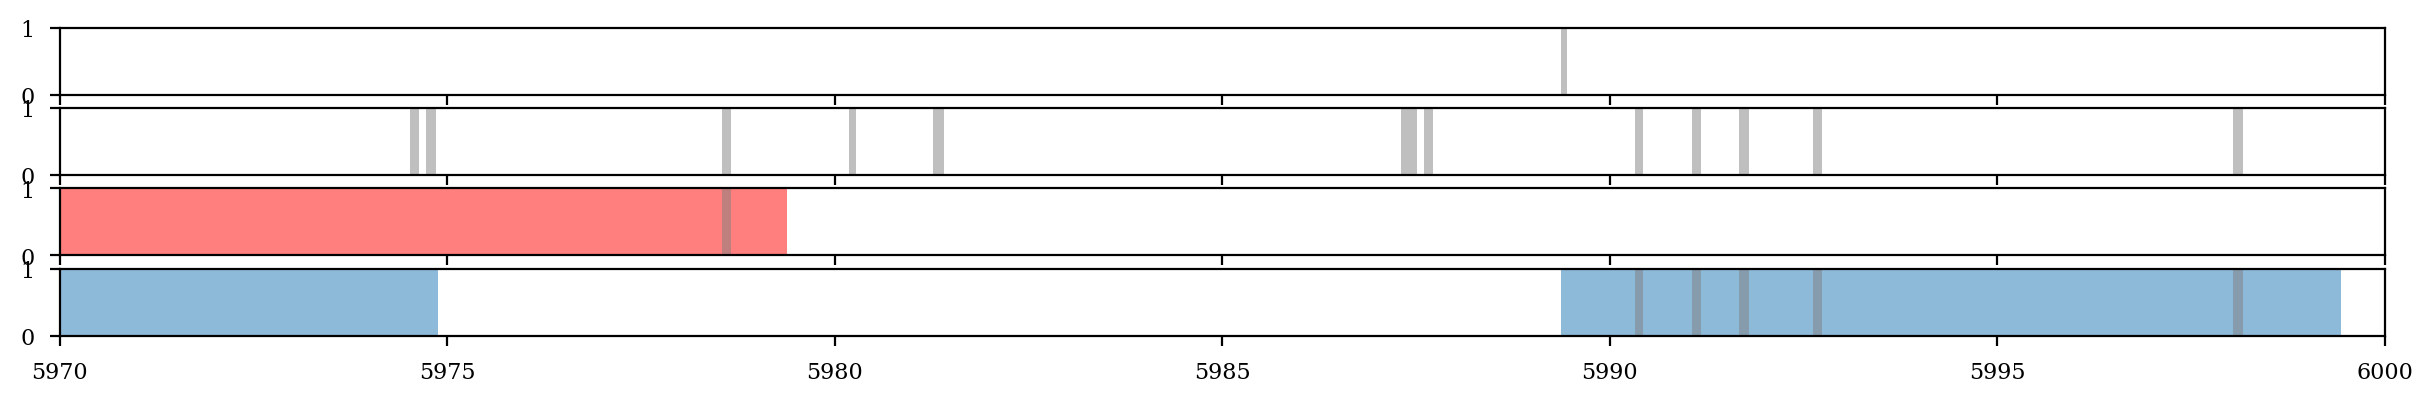

<AxesSubplot: xlabel='label', ylabel='trajectory_score'>

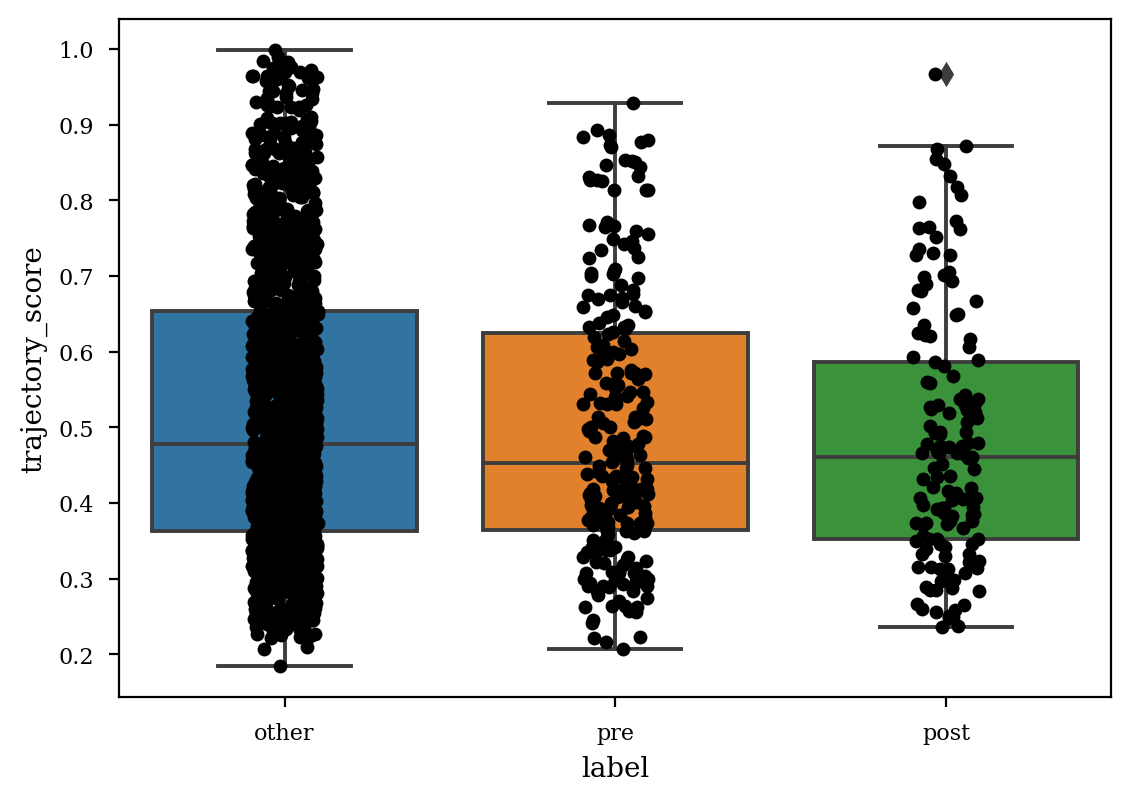

In [267]:
current_df["label"] = "other"
idx = functions.in_intervals(current_df.start.values, ied_obs_pre.data)
# idx = functions.find_intersecting_intervals(replay, replay[ied_obs_pre])
current_df.loc[idx,"label"] = "pre"
# idx = functions.find_intersecting_intervals(replay, replay[ied_obs_post])
idx = functions.in_intervals(current_df.start.values, ied_obs_post.data)
current_df.loc[idx,"label"] = "post"


ied_obs = nel.EpochArray(np.array([ied_epochs.start,ied_epochs.stop]).T)
# replay = nel.EpochArray(np.array([current_df.start,current_df.stop]).T)
replay_pre = nel.EpochArray(np.array([current_df.query("label.str.contains('pre')").start,current_df.query("label.str.contains('pre')").stop]).T)
replay_post = nel.EpochArray(np.array([current_df.query("label.str.contains('post')").start,current_df.query("label.str.contains('post')").stop]).T)

fig,ax = plt.subplots(4,1,figsize=(15,2),sharex=True)
epochplot(ied_obs,ax=ax[0])
for ep in ied_obs:
    ax[2].axvspan(ep.start-20, ep.start-10,color="r",alpha=.5,zorder=-1000)
    ax[3].axvspan(ep.start, ep.stop+10,alpha=.5,zorder=-1000)
epochplot(replay,ax=ax[1])
epochplot(replay_pre,ax=ax[2])
epochplot(replay_post,ax=ax[3])
plt.xlim(5970,6000)
plt.show()

sns.boxplot(data=current_df,x="label",y="trajectory_score")
sns.stripplot(data=current_df,x="label",y="trajectory_score",color="k")

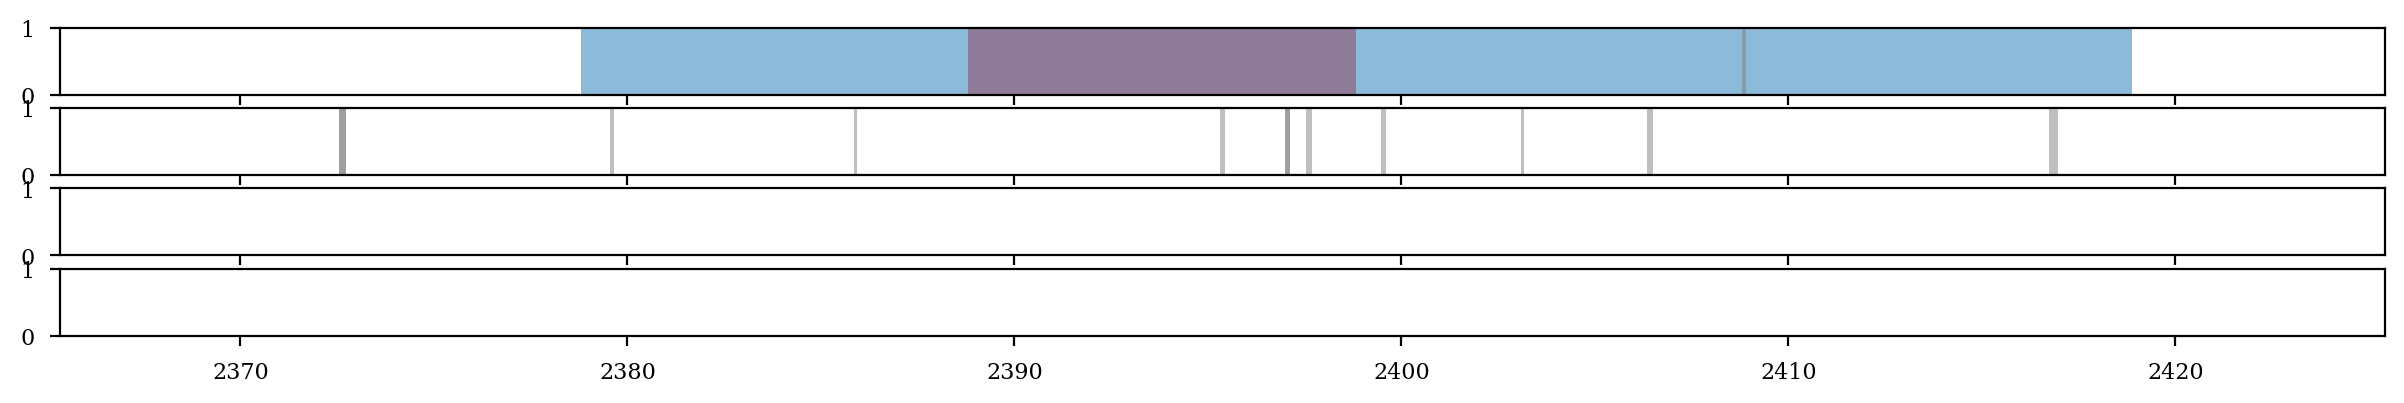

In [233]:
ied_obs = nel.EpochArray(np.array([ied_epochs.start,ied_epochs.stop]).T)
replay = nel.EpochArray(np.array([current_df.start,current_df.stop]).T)
replay_pre = nel.EpochArray(np.array([current_df.query("label.str.contains('pre')").start,current_df.query("label.str.contains('pre')").stop]).T)
replay_post = nel.EpochArray(np.array([current_df.query("label.str.contains('post')").start,current_df.query("label.str.contains('post')").stop]).T)

fig,ax = plt.subplots(4,1,figsize=(15,2),sharex=True)
epochplot(ied_obs,ax=ax[0])
epochplot(replay,ax=ax[1])
epochplot(replay_pre,ax=ax[2])
epochplot(replay_post,ax=ax[3])

plt.xlim(2395.32485 - 30,2395.40485 + 30)
# plt.axvspan(2395.32485,2395.40485,alpha=.5,zorder=1000)
ax[0].axvspan(ied_obs[0].start-20, ied_obs[0].start-10,color="r",alpha=.5,zorder=-1000)

ax[0].axvspan(ied_obs[0].start-30, ied_obs[0].stop+10,alpha=.5,zorder=-1000)


In [107]:
np.argmin(np.abs(ied_obs.starts - 2410))

0

In [55]:
np.diff(ied_epochs.start) > 30

array([ True, False, False, False, False,  True, False,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
        True, False,  True,  True,  True, False,  True, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True,  True,

In [43]:
time_range = [-20,10]
time_range = [0,10]

trajectory_score = []
events = current_df.start.values
for r in ied_epochs.start:
    idx = (events > r + time_range[0]) & (events < r + time_range[1])
    trajectory_score.append(current_df[idx].trajectory_score.values)

In [53]:
np.abs(current_df.start.values[100] - ied_epochs.start).min()

47.24235000000044

In [ ]:
for ripple_start in current_df.start.values:
    ied_epochs.start

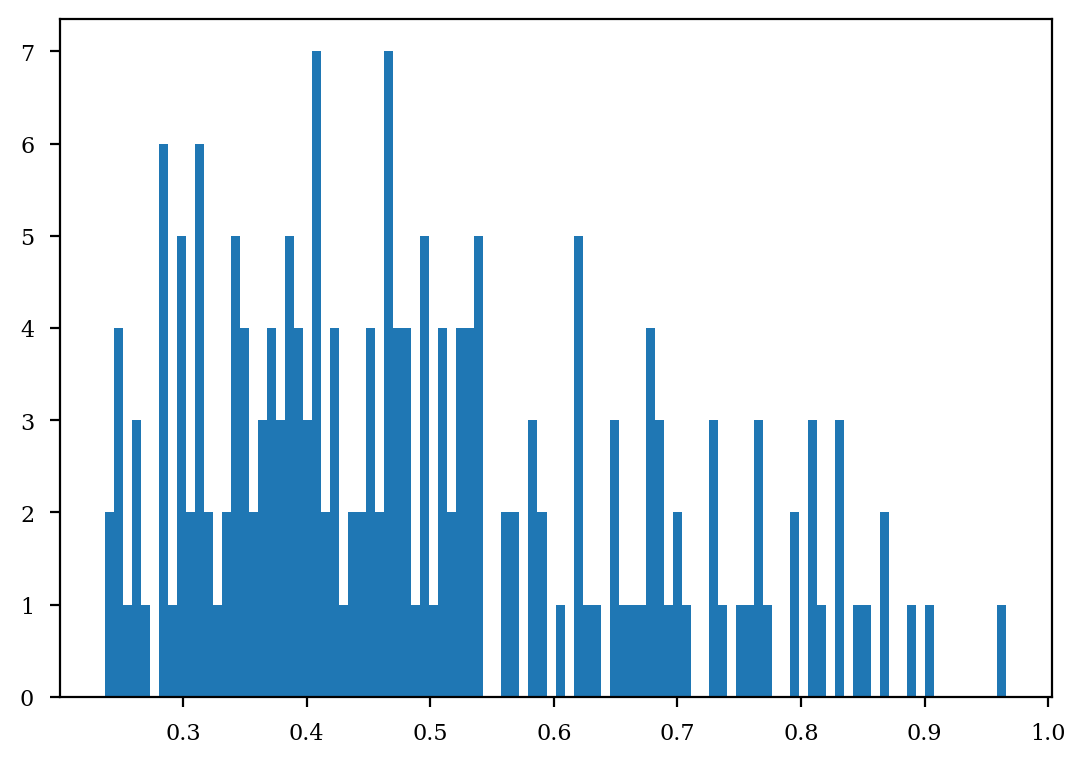

In [44]:
plt.hist(np.hstack(trajectory_score),100)
plt.show()

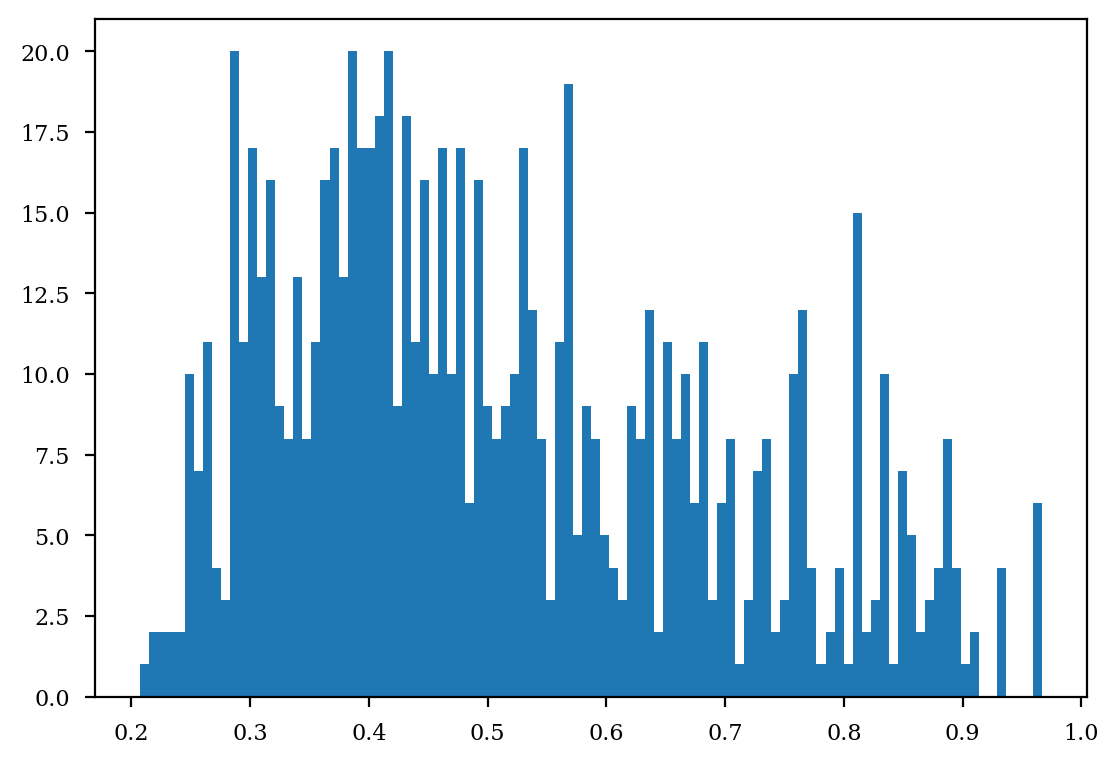

In [42]:
plt.hist(np.hstack(trajectory_score),100)
plt.show()